# Survival Analysis - Breast Cancer

<i>Survival analysis is the study of survival times and of the factors that influence them. It is is a statistical method to investigate the expected duration of time until an event of interest occurs. The goals of survival analysis are to estimate the survival distribution, to compare two or more survival distributions, or to assess the effects on a number of factors on survival.</i>

<i>For data I will use the german breast cancer dataset available in the sksurv package.</i>

## Import Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
from sksurv.datasets import load_gbsg2

data_x, data_y = load_gbsg2()
pd.DataFrame(data_y).head()

,cens,time
0,True,1814.0
1,True,2018.0
2,True,712.0
3,True,1807.0
4,True,772.0


## Exploratory Data Analysis

In [3]:
data_x.head()

,age,estrec,horTh,menostat,pnodes,progrec,tgrade,tsize
0,70.0,66.0,no,Post,3.0,48.0,II,21.0
1,56.0,77.0,yes,Post,7.0,61.0,II,12.0
2,58.0,271.0,yes,Post,9.0,52.0,II,35.0
3,59.0,29.0,yes,Post,4.0,60.0,II,17.0
4,73.0,65.0,no,Post,1.0,26.0,II,35.0


In [5]:
pd.DataFrame(data_y).head()

,cens,time
0,True,1814.0
1,True,2018.0
2,True,712.0
3,True,1807.0
4,True,772.0


## Estimating the Survival Curve

In [8]:
status = 'cens'
t = 'time'

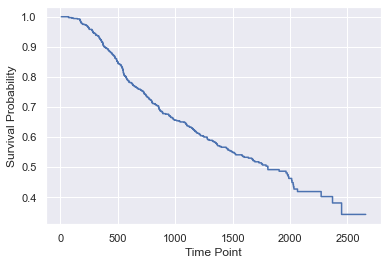

In [9]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(data_y[status], data_y[t])
plt.step(time, survival_prob)
plt.ylabel('Survival Probability')
plt.xlabel('Time Point')
plt.show()

## Breakout by Factor Hormone Therapy

In [8]:
data_x["horTh"].value_counts()

no     440
yes    246
Name: horTh, dtype: int64

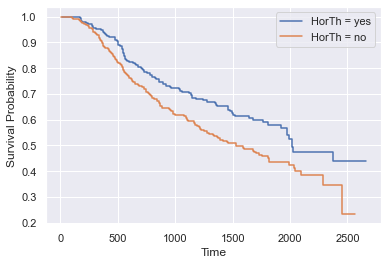

In [9]:
for horTh in ("yes", "no"):
    mask = data_x["horTh"] == horTh
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y[status][mask],
        data_y[t][mask])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="HorTh = %s" % horTh)

plt.ylabel('Survival Probability')
plt.xlabel('Time')
plt.legend(loc="best")
plt.show()

## Breakout by Factor Menostat

In [10]:
data_x["menostat"].value_counts()

Post    396
Pre     290
Name: menostat, dtype: int64

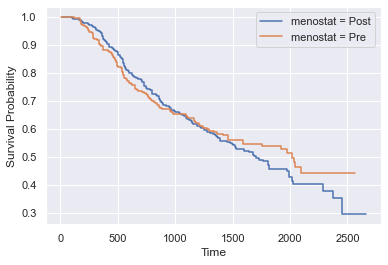

In [11]:
for menostat in ("Post", "Pre"):
    mask = data_x["menostat"] == menostat
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y[status][mask],
        data_y[t][mask])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="menostat = %s" % menostat)

plt.ylabel('Survival Probability')
plt.xlabel('Time')
plt.legend(loc="best")
plt.show()

## Breakout by Factor Tumor Grade

In [10]:
data_x["tgrade"].value_counts()

II     444
III    161
I       81
Name: tgrade, dtype: int64

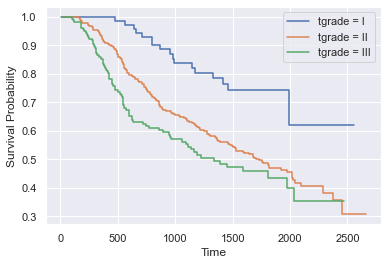

In [15]:
for tgrade in ("I", "II", "III"):
    mask = data_x["tgrade"] == tgrade
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y[status][mask],
        data_y[t][mask])
    
    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="tgrade = %s" % tgrade)

plt.ylabel('Survival Probability')
plt.xlabel('Time')
plt.legend(loc="best")
plt.show()

## Cox Proportional Hazards Model

In [16]:
from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,age,estrec,horTh=yes,menostat=Post,pnodes,progrec,tgrade=II,tgrade=III,tsize
0,70.0,66.0,0.0,1.0,3.0,48.0,1.0,0.0,21.0
1,56.0,77.0,1.0,1.0,7.0,61.0,1.0,0.0,12.0
2,58.0,271.0,1.0,1.0,9.0,52.0,1.0,0.0,35.0
3,59.0,29.0,1.0,1.0,4.0,60.0,1.0,0.0,17.0
4,73.0,65.0,0.0,1.0,1.0,26.0,1.0,0.0,35.0


In [17]:
from sksurv.linear_model import CoxPHSurvivalAnalysis

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)

CoxPHSurvivalAnalysis()

In [20]:
pd.Series(estimator.coef_, index=data_x_numeric.columns).sort_values(ascending=False)

tgrade=III       0.779350
tgrade=II        0.635979
menostat=Post    0.258157
pnodes           0.048782
tsize            0.007798
estrec           0.000198
progrec         -0.002217
age             -0.009453
horTh=yes       -0.346242
dtype: float64

In [25]:
estimator.get_params()

{'alpha': 0, 'n_iter': 100, 'ties': 'breslow', 'tol': 1e-09, 'verbose': 0}